# RGB Contrast Analysis

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split, Subset
from torchvision import transforms
from torchvision.transforms import functional as TF
from PIL import Image
import glob
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import cv2
from pytorch_msssim import ssim
from skimage.morphology import skeletonize
import re

In [ ]:
# Read images form a folder into an array
image_folder_1 = "<DATASET>"
image_folder_2 = "<DATASET>"

image_paths_1 = sorted(glob.glob(os.path.join(image_folder_1, "*.tif")))
image_paths_2 = sorted(glob.glob(os.path.join(image_folder_2, "*.tif")))
images_1 = [cv2.imread(img_path) for img_path in image_paths_1]
images_2 = [cv2.imread(img_path) for img_path in image_paths_2]
num = len(image_paths_1)

def local_contrast(image, block_size=16):
    """Compute average local contrast (std in blocks)."""
    h, w = image.shape
    stds = []
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = image[i:i+block_size, j:j+block_size]
            if block.size > 0:
                stds.append(np.std(block))
    return np.mean(stds)

In [3]:
nf_contrasts_r = []
f_contrasts_r = []
nf_contrasts_g = []
f_contrasts_g = []
nf_contrasts_b = []
f_contrasts_b = []

for i in range(0, num):
    img_1 = images_1[i]
    img_2 = images_2[i]
    b_channel, g_channel, r_channel = cv2.split(img_1)
    b_channel_f, g_channel_f, r_channel_f = cv2.split(img_2)
    cont_1_r = local_contrast(r_channel)
    cont_2_r = local_contrast(r_channel_f)
    cont_1_g = local_contrast(g_channel)
    cont_2_g = local_contrast(g_channel_f)
    cont_1_b = local_contrast(b_channel)
    cont_2_b = local_contrast(b_channel_f)
    nf_contrasts_r.append(cont_1_r)
    f_contrasts_r.append(cont_2_r)
    nf_contrasts_g.append(cont_1_g)
    f_contrasts_g.append(cont_2_g)
    nf_contrasts_b.append(cont_1_b)
    f_contrasts_b.append(cont_2_b)

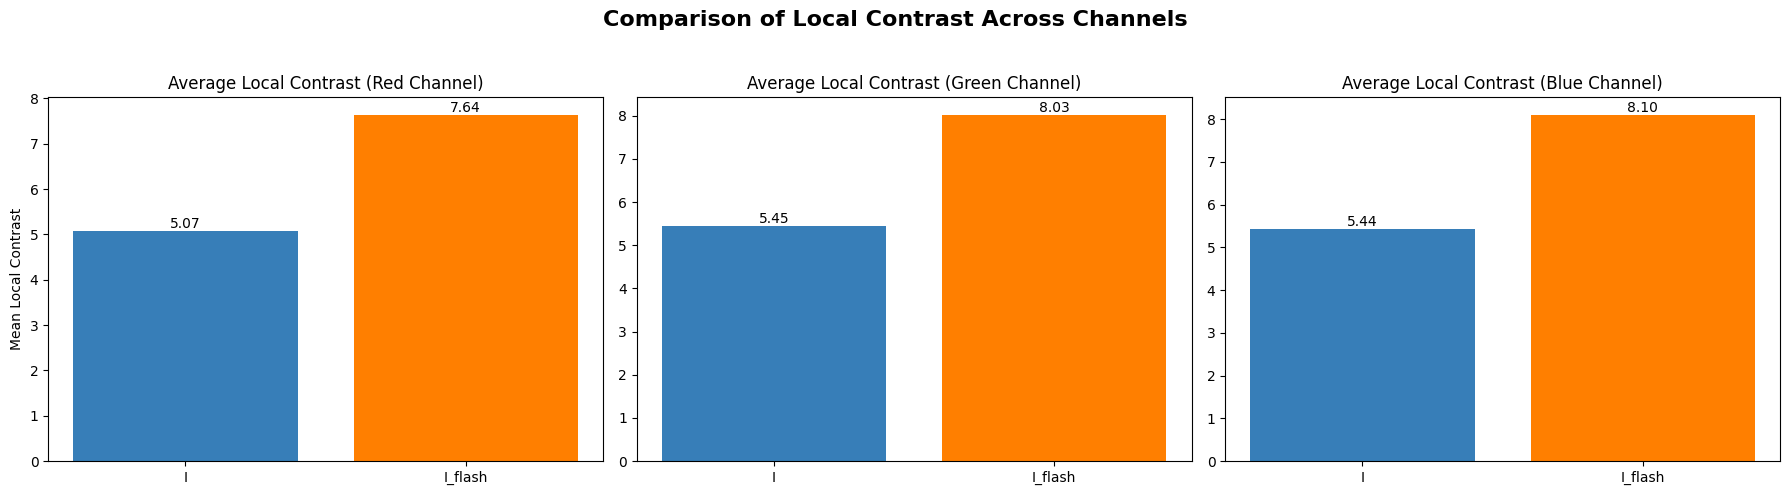

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Means
vals_r = [np.mean(nf_contrasts_r), np.mean(f_contrasts_r)]
vals_g = [np.mean(nf_contrasts_g), np.mean(f_contrasts_g)]
vals_b = [np.mean(nf_contrasts_b), np.mean(f_contrasts_b)]

labels = ['I', 'I_flash']

plt.figure(figsize=(18, 5))

# --- Red Channel ---
plt.subplot(1, 3, 1)
bars = plt.bar(labels, vals_r, color=['#377eb8', '#ff7f00'])
plt.title('Average Local Contrast (Red Channel)')
plt.ylabel('Mean Local Contrast')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f"{bar.get_height():.2f}", ha='center', va='bottom')

# --- Green Channel ---
plt.subplot(1, 3, 2)
bars = plt.bar(labels, vals_g, color=['#377eb8', '#ff7f00'])
plt.title('Average Local Contrast (Green Channel)')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f"{bar.get_height():.2f}", ha='center', va='bottom')

# --- Blue Channel ---
plt.subplot(1, 3, 3)
bars = plt.bar(labels, vals_b, color=['#377eb8', '#ff7f00'])
plt.title('Average Local Contrast (Blue Channel)')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f"{bar.get_height():.2f}", ha='center', va='bottom')

plt.suptitle("Comparison of Local Contrast Across Channels", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()